In [1]:
import  os
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('../data_preprocessing/Merged_data/002_verwaltung_with_holidays_indoor_person_counts.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

In [3]:
df.set_index('DateTime',inplace=True)

In [4]:
df = df.astype({'is_holiday': 'int32', 'day_of_week': 'int32', 'hour_of_day': 'int32', 'is_working_hour': 'int32'})

In [5]:
# Define the date ranges for training and test data
train_end_date = df.index.min() + pd.DateOffset(months=9)
test_start_date = train_end_date

# Split the DataFrame
train_data = df[:train_end_date]
test_data = df[test_start_date:]

In [6]:

# Prepare the data
input_cols = [ 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'heating_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Train the KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 4.8464
RMSE: 2.2015
MAE: 1.7798
R² Score: -0.0014


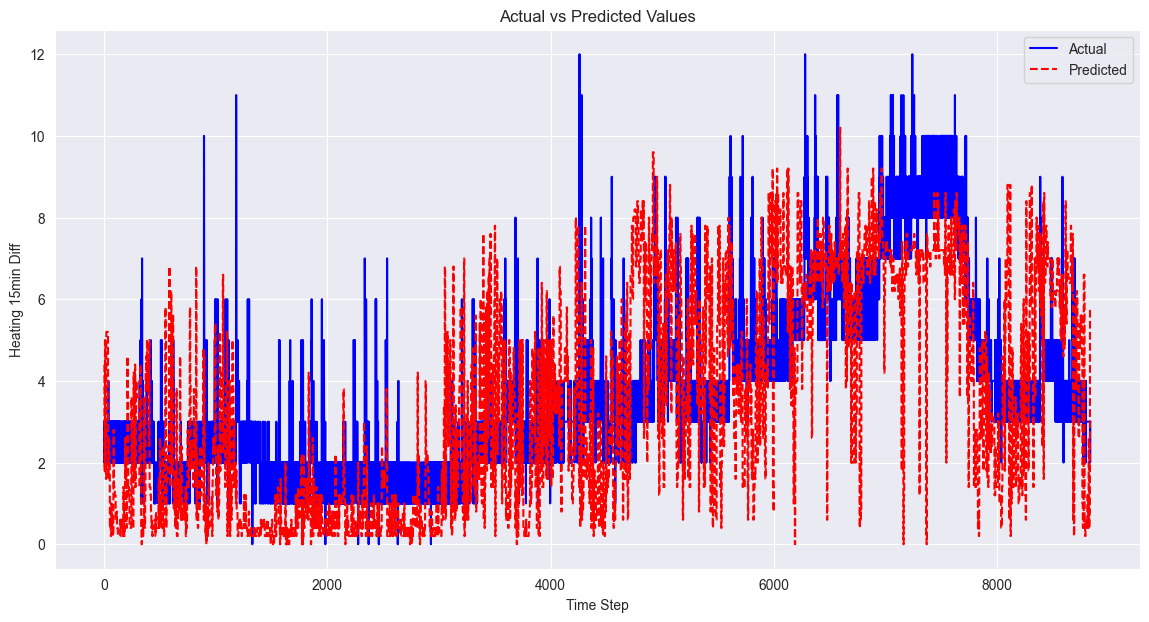

In [7]:
# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({
    'Time Step': range(len(y_test)),
    'Actual': y_test,
    'Predicted': y_pred
})

# Plot using Matplotlib
plt.figure(figsize=(14, 7))
plt.plot(df_results['Time Step'], df_results['Actual'], label='Actual', color='b')
plt.plot(df_results['Time Step'], df_results['Predicted'], label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Prepare the data
input_cols = [ 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'heating_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Train the KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 5.2065
RMSE: 2.2818
MAE: 1.8050
R² Score: -0.0758


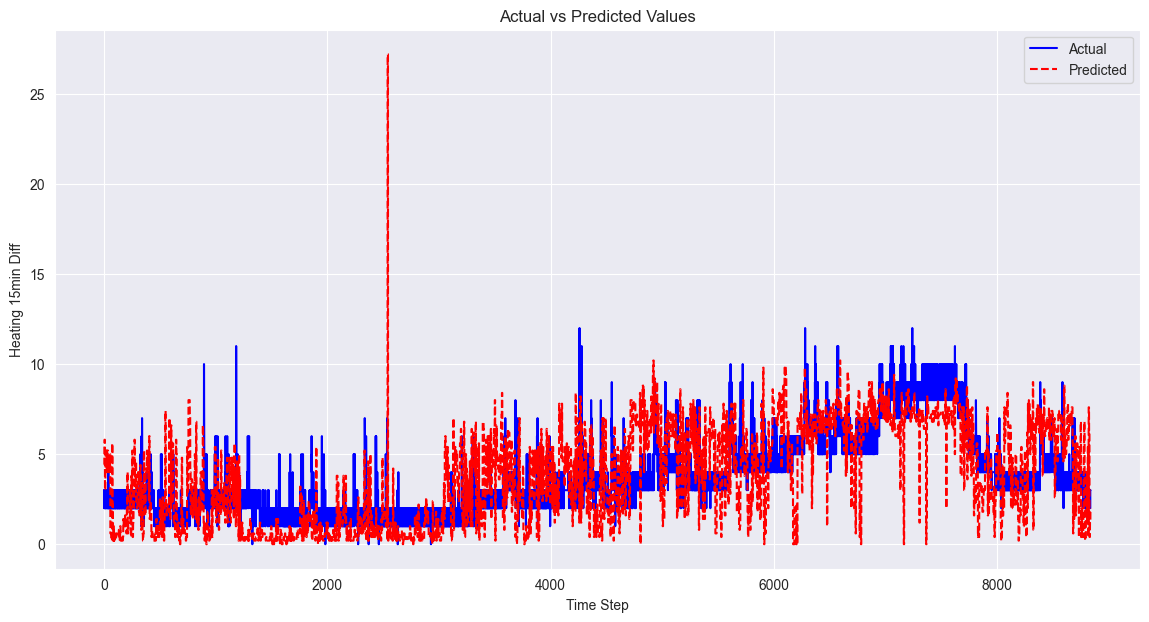

In [9]:
# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Prepare the data
input_cols = [  'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction',
       'indoor_temperature', 'temperature_difference']
target_col = 'heating_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Train the KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 4.8034
RMSE: 2.1917
MAE: 1.7600
R² Score: 0.0075


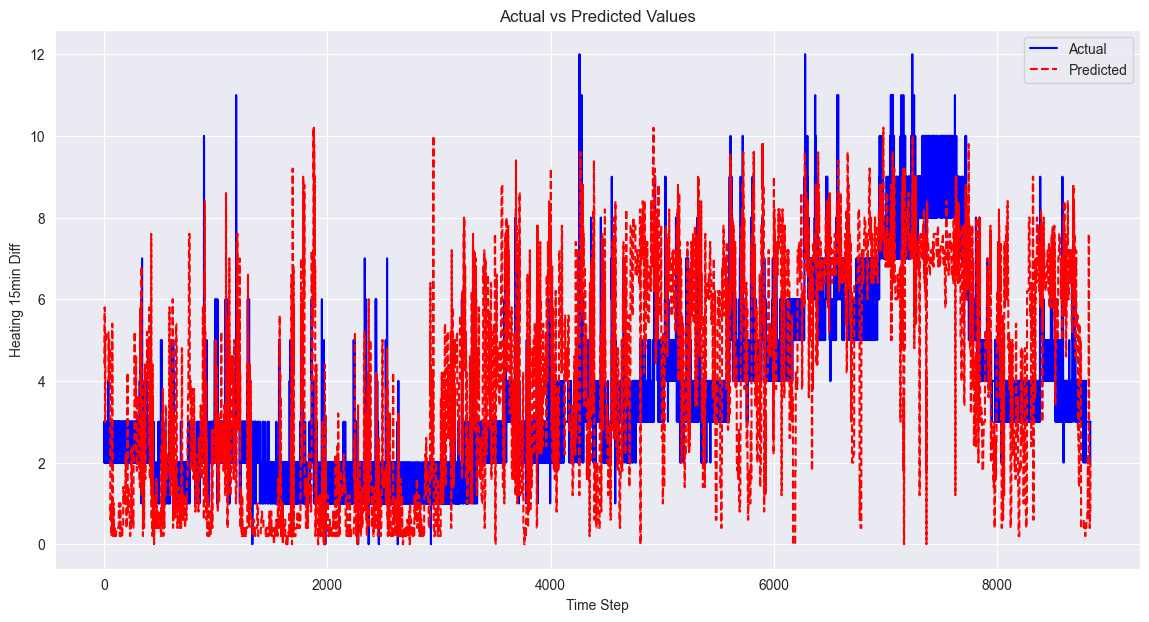

In [11]:
# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
input_cols = ['is_holiday', 'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
              'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
              'Wind Speed', 'Wind Direction', 'indoor_temperature', 'temperature_difference']
target_col = 'heating_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Define the parameter grid
param_dist = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the KNN Regressor
knn = KNeighborsRegressor()

tscv = TimeSeriesSplit(n_splits=5)
# Perform Random Search
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=100, cv=tscv, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the KNN Regressor with the best parameters
best_knn = random_search.best_estimator_
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'weights': 'distance', 'p': 1, 'n_neighbors': 25}
MSE: 3.7177
RMSE: 1.9281
MAE: 1.5463
R² Score: 0.2318


In [14]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
input_cols = ['is_holiday', 'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
              'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
              'Wind Speed', 'Wind Direction', 'indoor_temperature', 'temperature_difference']
target_col = 'heating_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the KNN Regressor
knn = KNeighborsRegressor()

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform Grid Search
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=tscv, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the KNN Regressor with the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found: {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
MSE: 3.7177
RMSE: 1.9281
MAE: 1.5463
R² Score: 0.2318
